In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

In [269]:
train = pd.read_csv('C:/Users/Rishil/Documents/Jupyter Notebook/Data Mining/Datasets/mobile_price_classification_train.csv')
test = pd.read_csv('C:/Users/Rishil/Documents/Jupyter Notebook/Data Mining/Datasets/mobile_price_classification_test.csv')
df = pd.concat([test,train])
df.to_csv('mobile_price_classification.csv')
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1.0,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,NaN
1,2.0,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,NaN
2,3.0,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,NaN
3,4.0,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,NaN
4,5.0,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,NaN


In [270]:
#dropping the unnecessary columns
df.drop(df[["id","price_range"]],axis = 1,inplace = True)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [271]:
#appending the target column from train module to the dataset
df['price_range'] = train['price_range']

<AxesSubplot:>

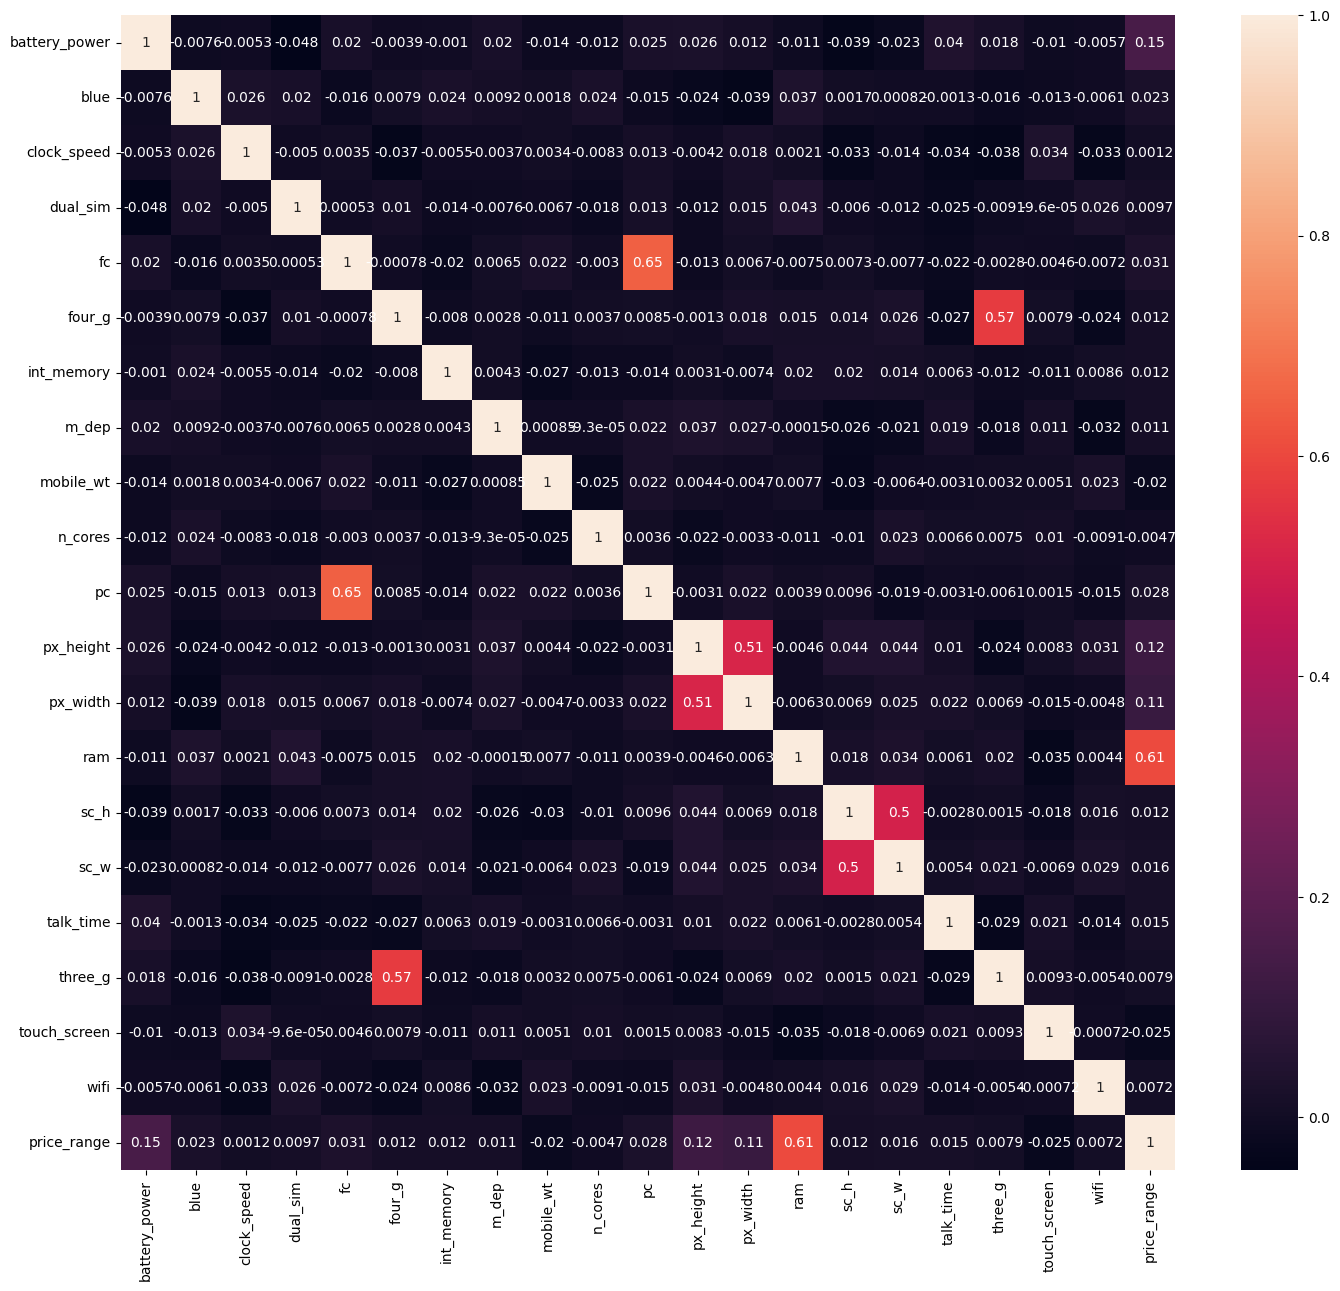

In [6]:
#visualization of pairplot
plt.figure(figsize = (17,15))
sns.heatmap(df.corr(),annot = True)

# Feature Selection And Scaling techniques

In [272]:
#Original Dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,1
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,2
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,2
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [273]:
# Feature Scaling using Quantile Transform
scaled_cols = list(df.columns)[0:-1]
scaler = QuantileTransformer()
new_df = pd.DataFrame(scaler.fit_transform(df.iloc[:,0:-1]),columns=scaled_cols)

In [274]:
#appending target to new_df
new_df['price_range'] = pd.Series(df['price_range'].values)
new_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.372627,1.0,0.603604,1.0,0.960460,0.0,0.053053,0.000000,0.933433,0.315816,...,0.207207,0.609430,0.859925,0.474474,0.660160,0.000000,0.0,1.0,0.0,1
1,0.234234,1.0,0.000000,1.0,0.561562,1.0,0.947948,0.795295,0.917918,0.579580,...,0.639059,0.244755,0.969985,0.087087,0.000000,0.287287,1.0,0.0,0.0,2
2,0.870871,1.0,0.930931,0.0,0.289289,0.0,0.411912,0.898398,0.877878,0.315816,...,0.896026,0.578579,0.573393,0.833333,0.823824,0.448448,0.0,1.0,1.0,2
3,0.699700,0.0,0.000000,1.0,0.995996,1.0,0.379880,0.493994,0.135636,1.000000,...,0.267267,0.836837,0.969000,0.342843,0.000000,0.287287,1.0,1.0,0.0,2
4,0.631423,0.0,0.470971,0.0,0.899900,1.0,0.762763,0.493994,0.241742,0.697197,...,0.641642,0.212212,0.403248,0.684685,0.721221,0.287287,1.0,0.0,1.0,1


In [275]:
#selecting the input and output features
x = new_df.iloc[:,0:-1]
y = new_df.iloc[:,-1]

In [276]:
#splitting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

<AxesSubplot:xlabel='Features'>

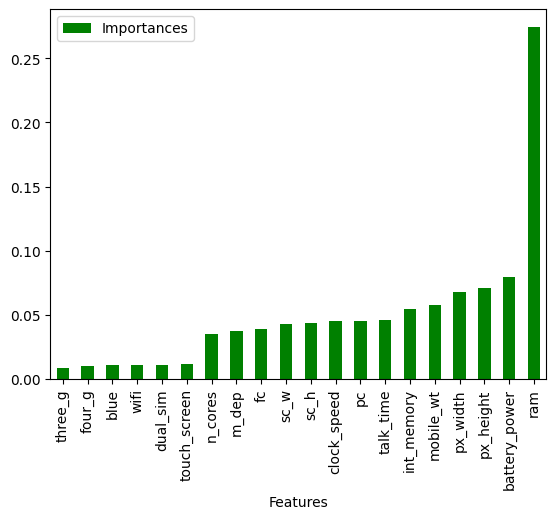

In [277]:
# Feature Selection Using Ensemble learning
from sklearn.ensemble import RandomForestClassifier

#creating the random forest with hyperparameters
model = RandomForestClassifier(n_estimators = 350)

#fit the model to start training
model.fit(x,y)

#get the importance of the resulting features
importances = model.feature_importances_

#create a dataframe for visualization
final_df = pd.DataFrame({"Features":pd.DataFrame(x).columns,"Importances":importances})

#sort in ascending order to better visualization
final_df = final_df.sort_values('Importances')

#plot the feature importances in bars
final_df.plot.bar(x = 'Features',y = 'Importances',color = 'green')

# Data Exploratory Analysis using Data visualization techniques

In [278]:
features = ["ram", "battery_power","int_memory","mobile_wt","px_width","px_height"]

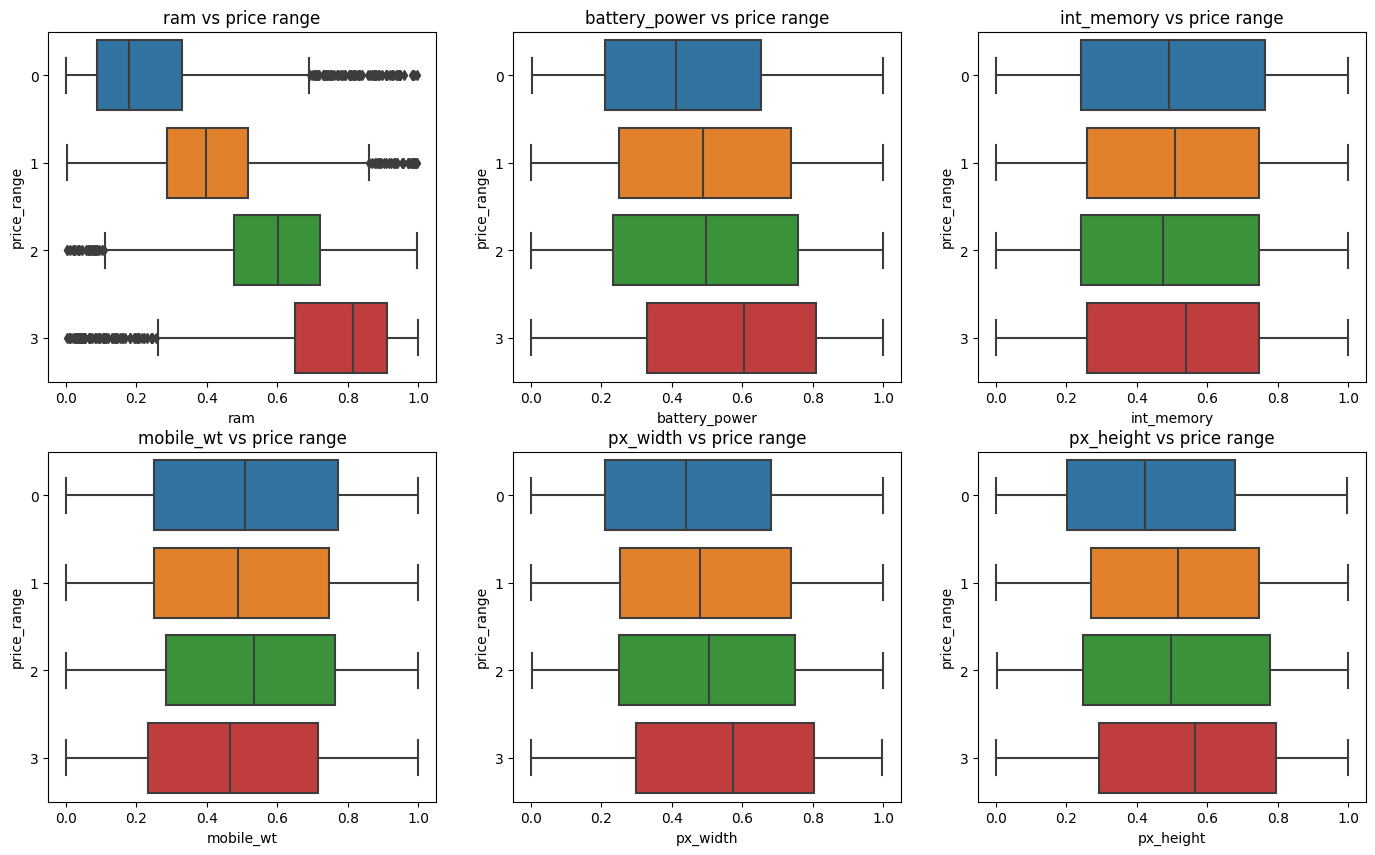

In [279]:
#box plot analysis
plt.figure(figsize = (17,10))
for f in range(0,len(features)):
    plt.subplot(2,3,f + 1)
    plt.title(f"{features[f]} vs price range")
    sns.boxplot(data=new_df,x = features[f],y = 'price_range',orient="h")

# Handling Outliers

We have detected outliers in the RAM column


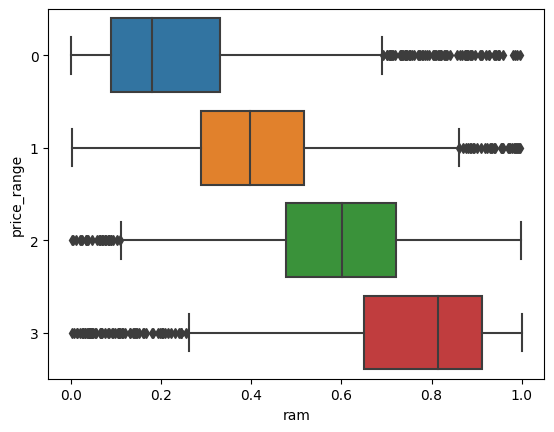

In [280]:
#Detection of outliers in RAM column using box plot
sns.boxplot(data = new_df,x = "ram",y = "price_range", orient = 'h')
print("We have detected outliers in the RAM column")

In [281]:
#removing outliers using Quantile-based Flooring and Capping
def remove_outliers(target):
    Q1 = new_df['ram'].loc[new_df['price_range'] == target].quantile(0.10)
    
    Q3 = new_df['ram'].loc[new_df['price_range'] == target].quantile(0.90)
    
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5*IQR)
    upper_fence = Q3 + (1.5*IQR)
    
    if len(new_df['ram'].loc[(new_df['ram'] < Q1) & (new_df['price_range'] == target)].to_list()) > 0:
        new_df["ram"] = np.where((new_df["ram"] < Q1) & (new_df['price_range'] == target), Q1,new_df['ram'])
        new_df['ram'].skew()
        
    if len(new_df['ram'].loc[(new_df['ram'] > Q3) & (new_df['price_range'] == target)].to_list()) > 0:
        new_df["ram"] = np.where((new_df["ram"] > Q3) & (new_df['price_range'] == target),Q3,new_df['ram'])
        new_df['ram'].skew()

In [286]:
#loop through each targets to remove outliers
classes = sorted(list(new_df['price_range'].unique()))
for c in classes:
    remove_outliers(c)

Thus,we have reduced the effect of outliers in the dataset. 

<AxesSubplot:xlabel='ram', ylabel='price_range'>

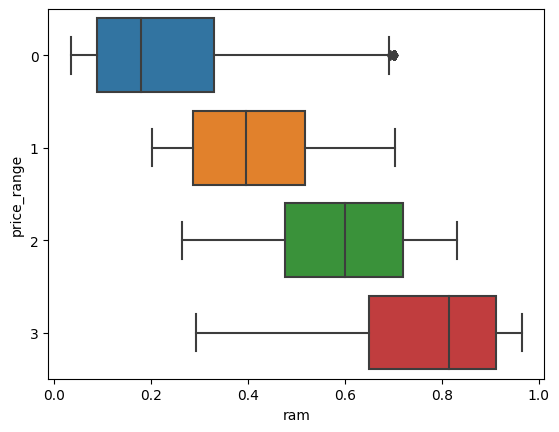

In [283]:
sns.boxplot(data = new_df,x = "ram",y = "price_range", orient = 'h')

After minimization, the outliers are still present in the dataset.So we are now dealing with the method to eliminate outliers.
This is done with the trimming technique.Trimming completely outliers from the dataset.

In [284]:
index = new_df[(new_df['ram'] >= 0.65) & (new_df['price_range'] == 0)].index
print(index,len(index))
new_df.drop(index, inplace=True)

Int64Index([  8,  14,  56,  61,  72,  74,  76,  86,  92, 103, 118, 138, 139,
            141, 144, 154, 156, 157, 162, 163, 185, 202, 214, 221, 246, 253,
            254, 263, 271, 298, 313, 317, 344, 352, 357, 361, 373, 419, 426,
            435, 453, 464, 467, 468, 485, 490, 493, 503, 512, 530, 531, 536,
            552, 565, 566, 574, 582, 586, 613, 626, 628, 630, 640, 661, 665,
            673, 687, 691, 699, 716, 736, 765, 774, 776, 797, 814, 861, 868,
            876, 880, 887, 904, 916, 920, 922, 941, 944, 967, 974, 977],
           dtype='int64') 90


<AxesSubplot:xlabel='ram', ylabel='price_range'>

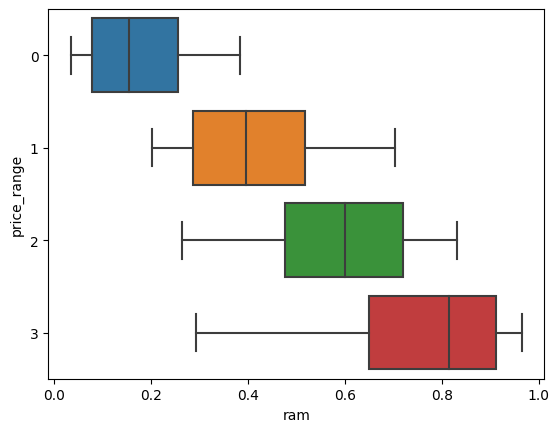

In [287]:
sns.boxplot(data = new_df,x = "ram",y = "price_range", orient = 'h')

# Applying classification algorithms on cleaned dataset

# Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

In [288]:
#defining the input features and output features
x = new_df.loc[:,features]
y = new_df.loc[:,["price_range"]]

In [289]:
#splitting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [290]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver = 'sag')

# fit the model with data
logreg.fit(x_train, y_train.values.ravel())

y_pred = logreg.predict(x_test)
y_pred_logreg = y_pred.copy()
log_score = logreg.score(x_test,y_test)
print(log_score)

0.6821305841924399


In [291]:
#evaluating the performance of the model
cnf_matrix_logreg = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[111   4   8  14]
 [ 43  60  25  20]
 [ 20  18  62  36]
 [ 25   3  15 136]]


Text(0.5, 23.52222222222222, 'Predicted label')

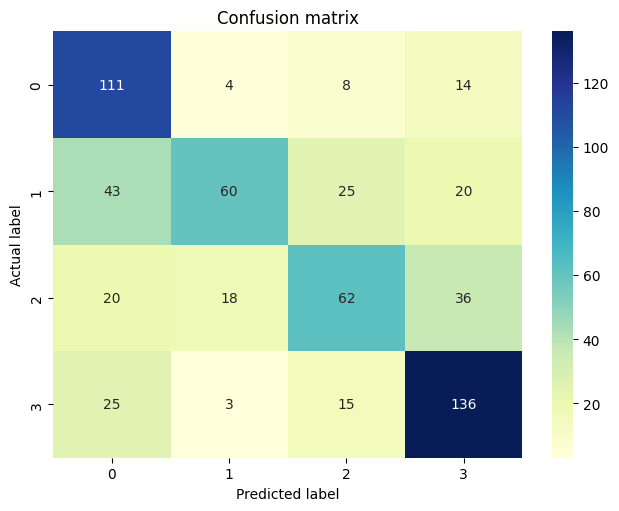

In [292]:
#visualization of confusion matrix using seaborn's heatmap
class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [293]:
#creating a classification report based on multiclass values
target_names = ['low',"medium","high","very high"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         low       0.82      0.87      0.85       132
      medium       0.60      0.69      0.64       146
        high       0.70      0.49      0.58       159
   very high       0.64      0.71      0.67       145

    accuracy                           0.68       582
   macro avg       0.69      0.69      0.68       582
weighted avg       0.69      0.68      0.68       582



# Classification Using Support Vector Machine 

In [296]:
from sklearn.svm import SVC

In [297]:
#training the SVM algorithm
svclassifier = SVC(kernel='rbf',C = 1,gamma = 1)
svclassifier.fit(x_train, y_train.values.ravel())

SVC(C=1, gamma=1)

In [299]:
#predicting the model
y_pred = svclassifier.predict(x_test)
y_pred_svc = y_pred.copy()
#calculating the score
svc_score = svclassifier.score(x_test,y_test)
print(svc_score)

0.7422680412371134


Confusion Matrix:
 AxesSubplot(0.125,0.11;0.62x0.77)
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       132
           1       0.62      0.74      0.68       146
           2       0.72      0.74      0.73       159
           3       0.86      0.64      0.74       145

    accuracy                           0.74       582
   macro avg       0.76      0.75      0.75       582
weighted avg       0.75      0.74      0.74       582



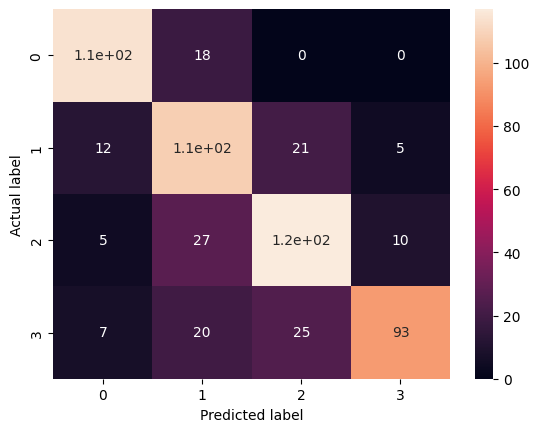

In [300]:
#evaluating the performance of the algorithm
cnf_matrix_svc = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",sns.heatmap(confusion_matrix(y_test,y_pred),annot = True))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Classification Report:\n",classification_report(y_test,y_pred))

# Classification Using Naive bayes Algorithm

In [301]:
from sklearn.naive_bayes import GaussianNB

In [302]:
#training the naive bayes algorithm
model = GaussianNB()
model.fit(x_train,y_train.values.ravel())

GaussianNB()

In [303]:
#predicting the model
y_pred = model.predict(x_test)
y_pred_naive_bayes = y_pred.copy()
print(y_pred)
#calculating the score
naive_bayes_score = model.score(x_test,y_test)
print(naive_bayes_score)

[1 1 3 3 3 0 3 2 1 3 1 3 3 3 2 2 0 2 3 2 1 1 2 0 1 3 1 1 2 2 1 2 0 3 0 0 1
 3 0 1 0 0 3 3 2 1 2 0 1 1 1 3 3 0 0 1 1 0 2 3 1 1 2 3 2 3 3 0 3 1 2 3 2 0
 3 0 1 3 0 1 1 3 3 1 1 0 1 2 0 3 1 1 2 3 0 1 1 2 0 3 3 0 0 1 1 2 0 1 2 2 3
 3 2 1 3 0 2 0 3 2 1 0 2 0 1 3 3 1 2 3 3 0 0 0 1 3 0 1 0 2 3 0 0 0 2 2 0 3
 3 0 0 2 2 1 3 1 2 0 3 3 0 3 2 2 1 1 0 2 1 3 1 0 0 3 1 1 0 0 0 3 2 1 1 0 3
 3 2 2 3 3 2 2 0 0 2 0 3 2 0 1 0 1 0 2 0 0 1 0 2 2 3 3 3 3 3 0 0 2 2 1 0 3
 0 3 3 0 0 1 2 3 0 0 1 0 2 0 1 0 3 1 0 0 3 0 2 2 2 2 0 0 1 0 2 1 0 3 1 1 1
 3 1 1 0 2 1 0 3 1 0 3 0 2 1 2 3 0 0 0 3 2 1 3 2 0 0 3 2 2 3 0 1 1 3 1 1 0
 1 3 3 1 2 3 3 0 1 1 0 3 0 1 1 0 3 3 3 2 3 2 1 3 3 0 0 2 1 2 2 3 1 0 1 3 1
 2 1 0 3 2 2 1 0 1 3 1 3 0 3 0 0 1 1 1 3 2 3 1 0 0 3 1 2 0 1 0 2 2 0 1 1 0
 3 3 3 2 3 3 2 2 1 0 0 1 1 3 1 2 0 0 0 3 1 0 3 0 2 2 0 1 3 2 2 3 2 1 3 2 3
 0 2 2 0 0 2 2 2 0 1 0 3 1 2 2 0 0 3 0 1 1 0 0 3 1 0 2 2 3 1 1 0 2 2 3 0 0
 0 2 2 0 3 3 0 1 1 1 2 3 1 2 1 2 3 2 3 2 3 2 0 3 3 3 1 2 0 0 0 2 3 1 1 1 1
 3 1 0 0 3 3 3 0 0 1 0 0 

Confusion Matrix:
 AxesSubplot(0.125,0.11;0.62x0.77)
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75       132
           1       0.52      0.53      0.52       146
           2       0.65      0.52      0.58       159
           3       0.69      0.68      0.69       145

    accuracy                           0.63       582
   macro avg       0.63      0.64      0.63       582
weighted avg       0.63      0.63      0.63       582



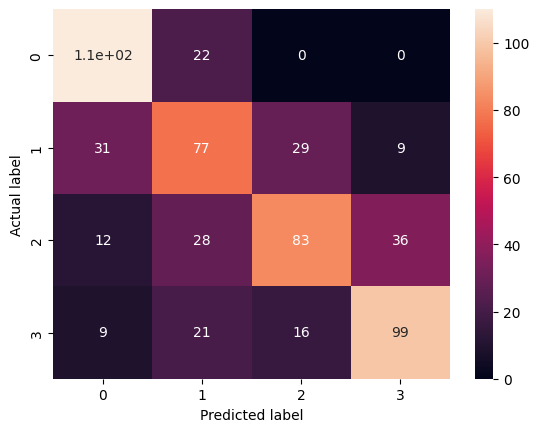

In [304]:
#evaluating the performance of the naive bayes algorithm
cnf_matrix_naive_bayes = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",sns.heatmap(confusion_matrix(y_test,y_pred),annot = True))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Classification Report:\n",classification_report(y_test,y_pred))

# Classification Using K nearest Neighbour

In [305]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [306]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 10)

#Train the model using the training sets
knn.fit(x_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = knn.predict(x_test)
y_pred_knn = y_pred.copy()
knn_score = accuracy_score(y_test, y_pred)
print(knn_score)

0.627147766323024


Confusion Matrix:
 AxesSubplot(0.125,0.11;0.62x0.77)
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76       132
           1       0.49      0.55      0.52       146
           2       0.59      0.56      0.57       159
           3       0.77      0.59      0.67       145

    accuracy                           0.63       582
   macro avg       0.64      0.63      0.63       582
weighted avg       0.64      0.63      0.63       582



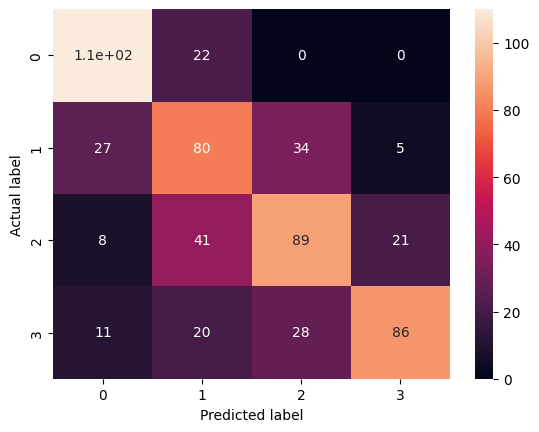

In [307]:
#evaluating the performance of the knn algorithm
knn_cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",sns.heatmap(confusion_matrix(y_test,y_pred),annot = True))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Classification Report:\n",classification_report(y_test,y_pred))

# Performance analysis of above mentioned classification models

In [317]:
#grabbing all confusion matrixs of all models
confusion_matrices = [cnf_matrix_logreg,cnf_matrix_svc,cnf_matrix_naive_bayes,knn_cnf_matrix]
#grabbing all accuracies of all models
accuracies = [log_score,svc_score,naive_bayes_score,knn_score]
models = ["Logistic Regression","Support Vector Machine","Naive Bayes","KNN"]

In [311]:
df_acc = pd.DataFrame({"Classification Models": models,"Accuracy":accuracies})

In [319]:
prediction_results = [y_pred_logreg,y_pred_svc,y_pred_naive_bayes,y_pred_knn]

In [321]:
df_performance_measures = []

In [322]:
for pred in prediction_results:
    temp = []
    temp.append(accuracy_score(y_test, pred))
    temp.append(f1_score(y_test, pred,average='weighted'))
    temp.append(recall_score(y_test, pred,average='weighted'))
    temp.append(precision_score(y_test,pred,average='weighted'))
    df_performance_measures.append(temp)


In [323]:
df_performance_measures

[[0.6821305841924399,
  0.677603618819017,
  0.6821305841924399,
  0.6857833021206446],
 [0.7422680412371134,
  0.7430807134032841,
  0.7422680412371134,
  0.7546012584163729],
 [0.634020618556701,
  0.6298271787428358,
  0.634020618556701,
  0.6329521504967167],
 [0.627147766323024,
  0.6267553515204811,
  0.627147766323024,
  0.6353743682080406]]

In [326]:
df_p = pd.DataFrame(df_performance_measures,index = models,columns = ["accuracy","f1 score","precision","recall"])
df_p.head()

,accuracy,f1 score,precision,recall
Logistic Regression,0.682131,0.677604,0.682131,0.685783
Support Vector Machine,0.742268,0.743081,0.742268,0.754601
Naive Bayes,0.634021,0.629827,0.634021,0.632952
KNN,0.627148,0.626755,0.627148,0.635374


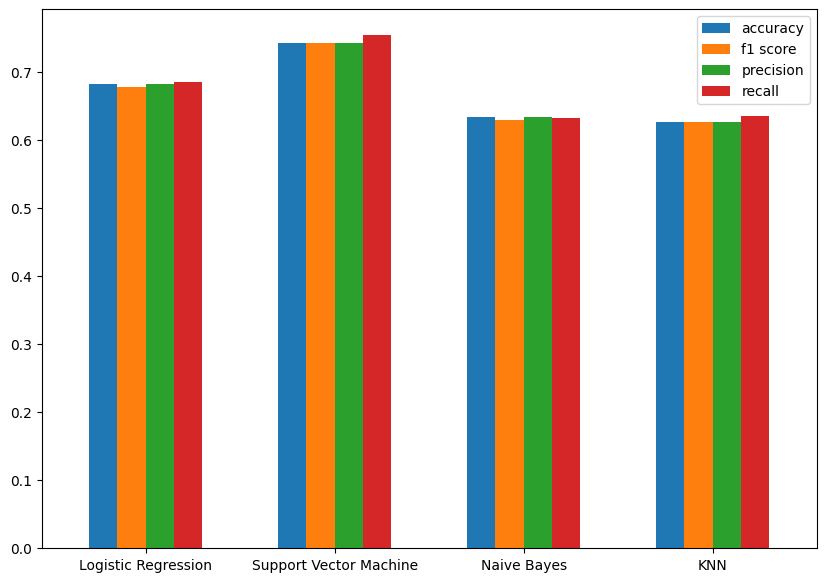

In [356]:
ax = df_p.plot.bar(rot = 0,figsize =(10,7),width = 0.6)

In [314]:
#plotting the precision-recall curve for multi-class problem
def show_precision_recall_curve():
    y_new = label_binarize(y, classes=[0,1,2,3])
    n_classes = 4
    
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test =\
        train_test_split(x, y_new, test_size=0.33, random_state=0)

    # classifier
    clf = OneVsRestClassifier(LinearSVC(random_state=0))
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    # Compute precision-recall curve for each class
    precision = dict()
    recall = dict()
    
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

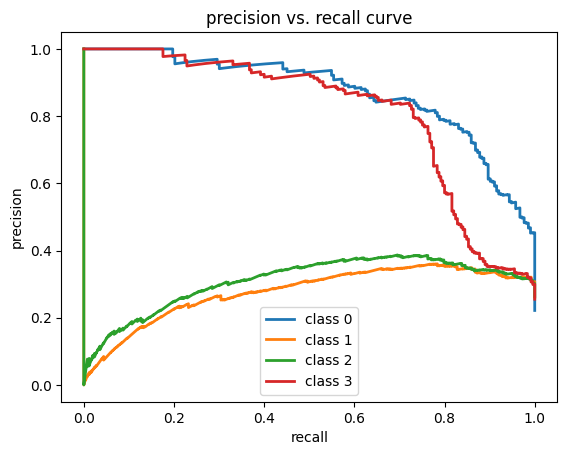

In [357]:
show_precision_recall_curve()

In [366]:
#plotting the auc-roc curve for multi-class problems
def show_auc_roc_curve():

    y_new = label_binarize(y, classes=[0,1,2,3])
    n_classes = 4
    
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test =\
        train_test_split(x, y_new, test_size=0.33, random_state=0)

    # classifier
    clf = OneVsRestClassifier(LinearSVC(random_state=0))
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()


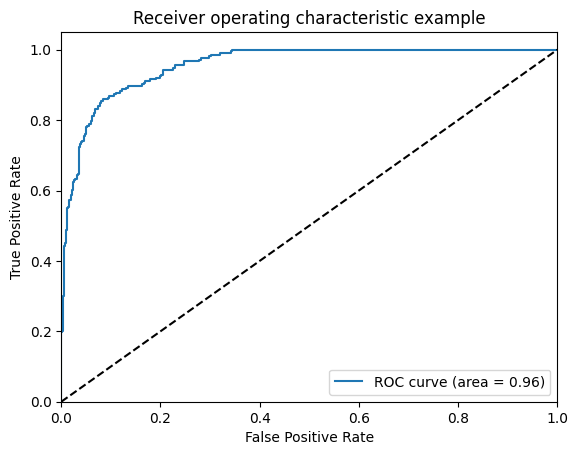

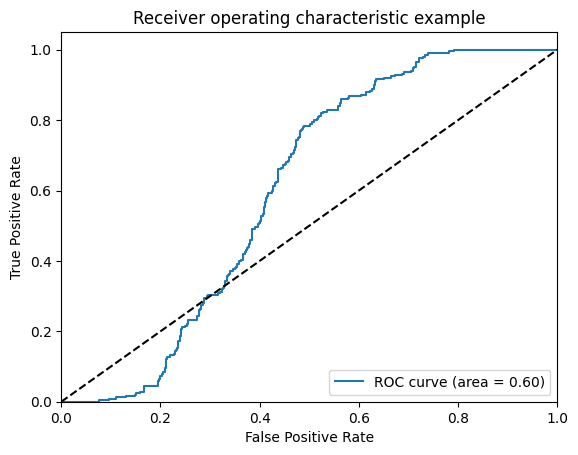

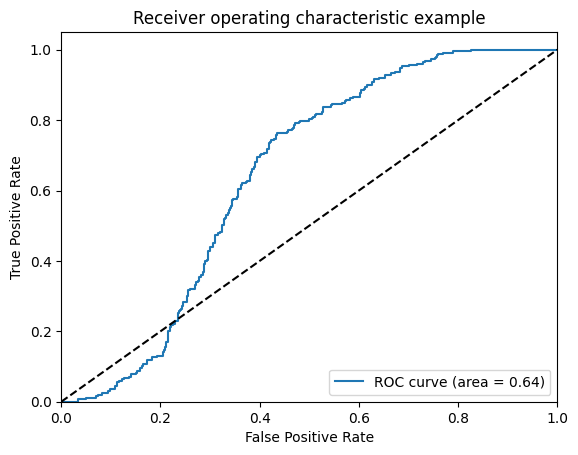

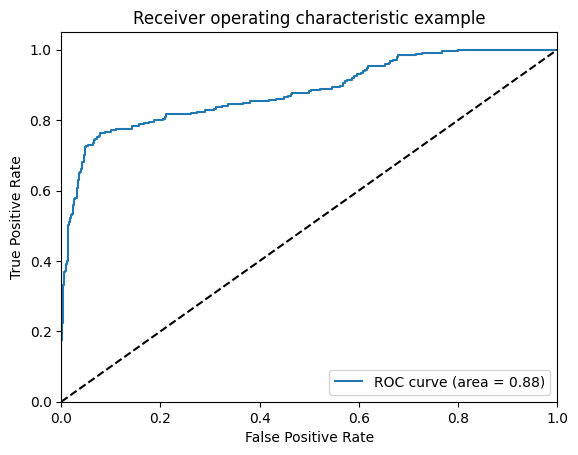

In [367]:
show_auc_roc_curve()